In [2]:
import os
import sys
import numpy as np
import pandas as pd
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_settings_v3 import *
from plot_auxiliary import *
from planar import create_proximity_graph
from auxiliary import getLinearReg, get_base_network_name

%matplotlib inline

net_type = 'DT'
param = 'param'

net_dir = os.path.join('..', 'networks', net_type)

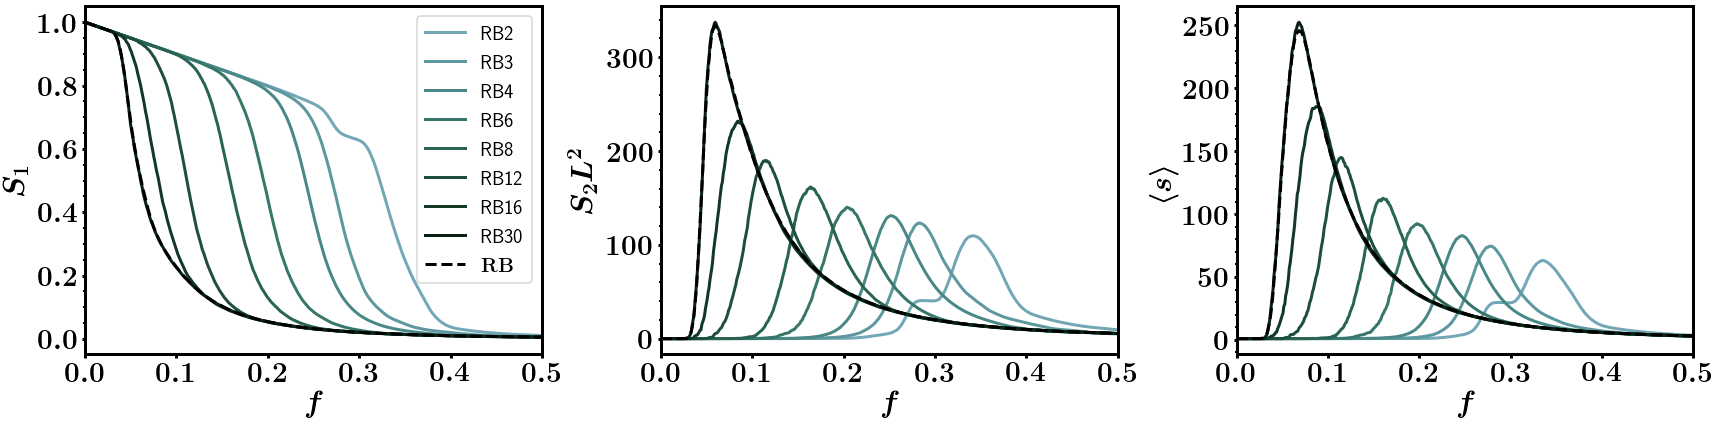

In [3]:
Bi_range = [2, 3, 4, 6, 8, 12, 16, 30]

colormap = sns.cubehelix_palette(
    len(Bi_range), start=2, rot=0.3, light=0.6, dark=0.1
)


ncols = 3
fig, axes = plt.subplots(figsize=(8*ncols, 6), ncols=ncols)
axes[0].set_ylabel(r'$S_1$')
axes[1].set_ylabel(r'$S_2L^2$')
axes[2].set_ylabel(r'$\langle s \rangle$')
for ax in axes:
    ax.set_xlabel(r'$f$')
    ax.set_xlim(0, 0.5)
N = 1024
for i, l in enumerate(Bi_range):
    attack = 'BtwU_cutoff{}'.format(l)
    df = load_dataframe(net_type, N, param, attack)
    axes[0].plot(df.f, df.Sgcc, color=colormap[i], label='RB{}'.format(l))
    axes[1].plot(df.f, df.Nsec, color=colormap[i])
    axes[2].plot(df.f, df.meanS, color=colormap[i])

attack = 'BtwU'
df = load_dataframe(net_type, N, param, attack)
axes[0].plot(df.f, df.Sgcc, '--', color='k', label=attack_dict[attack])
axes[1].plot(df.f, df.Nsec, '--', color='k')
axes[2].plot(df.f, df.meanS, '--', color='k')

axes[0].legend(fontsize=20)

plt.tight_layout()

fig_name = os.path.join(fig_dir, 'order_par_and_susceptibility_RBl_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()

In [4]:
sizes = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
l_values = np.arange(2, 100)
rc_values, rc_values_std = get_rc_values(sizes, l_values=l_values)
l_cutoff = get_l_cutoff(sizes, rc_values=rc_values)
l_cutoff

128
256
512
1024
2048
4096
8192
BtwU_cutoff6
BtwU_cutoff7
BtwU_cutoff8
BtwU_cutoff9
BtwU_cutoff10
BtwU_cutoff11
BtwU_cutoff12
BtwU_cutoff13
BtwU_cutoff14
BtwU_cutoff15
16384


{128: 11, 256: 15, 512: 19, 1024: 25, 2048: 33, 4096: 42, 8192: 54, 16384: 72}

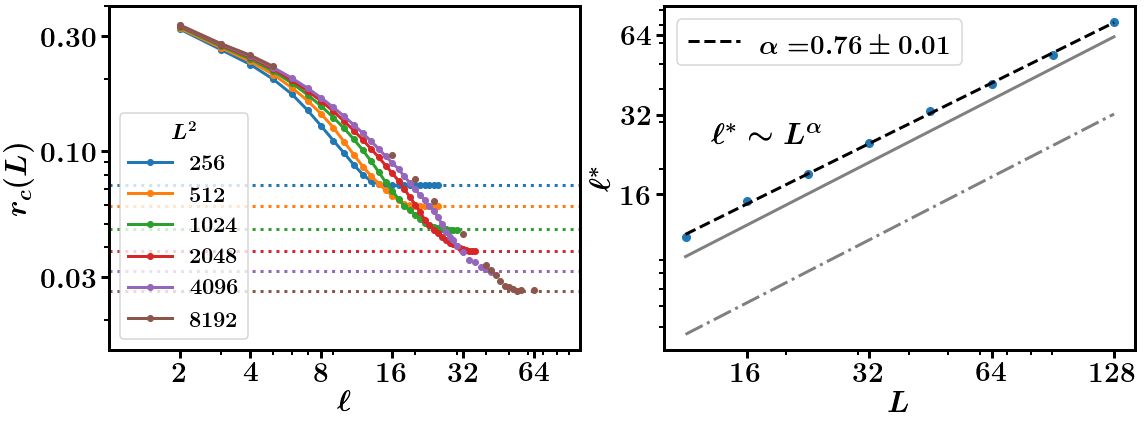

In [35]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols,6*nrows), ncols=ncols, nrows=nrows)

for ax in axes:
    ax.tick_params(which='minor', length=5)
    ax.tick_params(which='major', length=8)

ax = axes[0]
ax.set_xscale('log')
ax.set_xlim(1., 100)
ax.set_xticks([2, 4, 8, 16, 32, 64])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_yscale('log')
ax.set_ylim(0.015, 0.4)
ax.set_yticks([0.03, 0.1, 0.3])
ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

#ax.grid(True)
#ax.set_ylim(0, 0.15)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$r_c(L)$')
for i, size in enumerate([256, 512, 1024, 2048, 4096, 8192]): 
#for i, size in enumerate([256, 1024, 4096, 16384]): 
    #ax.errorbar(Bi_range, rc_values[size][1:], rc_values_std[size][1:], marker='o',# 'o-', 
    ax.plot(l_values, rc_values[size][1:], 'o-', 
        #color=colors[i], 
        #label=r'$L={{{}}}$'.format(int(np.sqrt(size)))
            label=r'${{{}}}$'.format(size)
    )
    ax.axhline(rc_values[size][0], linestyle=':', color=colors[i])
legend = ax.legend(loc='lower left', fontsize=22)
legend.set_title(r'$L^2$', prop={'size':22})

ax = axes[1]
X = np.sqrt(list(l_cutoff.keys()))
Y = np.array(list(l_cutoff.values()))
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\ell^*$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(X, Y, 'o', markersize=8)
Y_pred, slope, y_err = getLinearReg(X, Y)
label = r'$\alpha = $' + r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err)
ax.plot(X, Y_pred, '--', color='k', label=label)
ax.text(0.1, 0.6, r'$\ell^* \sim L^{\alpha}$', fontsize=30, transform=ax.transAxes)


X =  np.sqrt([128, 256, 512, 1024, 2048, 4096, 8192, 16384])
meanls = [4.721,  6.177,  8.102, 10.801, 13.946, 18.562, 24.187, 32.666]
diameters = [9.37, 12.42, 15.94, 20.66, 27.25, 36.01, 48.5, 64.7]
linestyles = ['-.', '-']
for i, Y in enumerate([meanls, diameters]):
    Y_pred, slope, y_err = getLinearReg(X, Y)    
    c = Y[0] / X[0]**slope
    text = r'${{{:.2f}}}\pm{{{:.2f}}}$'.format(slope, y_err)
    k = 3
    #ax.text(X[k], (Y_pred[k-1] + Y_pred[k])/2, text, fontsize=22)
    ax.plot(X, Y_pred, linestyles[i], color='grey')

#ax.set_xlim(12, 128)
ax.set_xticks([16, 32, 64, 128])
ax.get_xaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.set_yticks([16, 32, 64])
ax.get_yaxis().set_minor_formatter(mpl.ticker.NullFormatter())
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

ax.legend()
    
plt.tight_layout()
fig_name = os.path.join(fig_dir, 'peak_shifting_RBl_rc_{}'.format(net_type))
plt.savefig(fig_name + '.png')
plt.savefig(fig_name + '.pdf')

plt.tight_layout()
plt.show()